In [1]:
import numpy as np
from pyscf import gto,scf
from pyscf.grad import rhf as grhf
from pyscf.hessian import rhf as hrhf
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2
from AP_class import APDFT_perturbator as AP

ModuleNotFoundError: No module named 'AP_class'

### Morse potential
The Morse potential is the best fit for the binding potential of a diatomic molecule. <br>
It's parameters are: $D_e$ , the positive Dissociation Energy, $r_e$ the distance of equilibrium, and $a$ a parameter that gives the width of the energy hole.<br>
$a$ is correlated to the second derivative $k$ in the minum bt the relationship:
$ a = \sqrt{k_e/2D_e} $ and at reverse $ k_e = 2D_e a^2 $ <br>
If we assume the energy in the minimum to be zero we use the following expression:
$$ V_{Morse}(r)= D_e (1-e^{-a(r-r_e)})^2
$$
If other wise we chose to fit the total elettrostatic plus kinetic energy of the system, than we can express the potential as :
$$  V_{Morse}(r)= D_e (e^{-a2(r-r_e)}-2e^{-a(r-r_e)})+V(r=\infty)
$$
Such expression can be usefull because the V at infinite can be estimate accuratly from QM calculation for separated atoms (as long as the method chosen is size-consistent) , once for all. <br>
what we are left with is an expression of the potential in terms of only three parameters. <br>
If a method posses analytical first and second derivative we can fit with one single scf the whole potential energy curve of the biatomic dissociation. <br>
Such a scf can also come from an alchemycal perturbed density functional calculation... <br>
If this thing will in future be implemented, would be usefull the expression for the first and second derivatives of the Morse potential: 
$$  V_{Morse}(r)= D_e (e^{-2a(r-r_e)}-2e^{-a(r-r_e)})+D_e
$$ <br>
$$ \frac{dV_{Morse}}{dr}= -2a D_e(e^{-2a(r-r_e)}-e^{-a(r-r_e)}) 
$$ <br>
$$ \frac{dV_{Morse}^2}{dr^2}= -2a^2 D_e(e^{-a(r-r_e)}-2e^{-2a(r-r_e)})
$$ 
if $t=e^{-a(r-r_e)}$

$$ \frac{dV_{Morse}}{dr}= 2D_e a (t-t^2) 
$$ <br>
$$ \frac{dV_{Morse}^2}{dr^2}= 2 D_e a^2 (2t^2-t)
$$ 

$$ \tilde g = \frac{g}{2D_e} $$<br>
$$\tilde h = \frac{h}{2D_e}$$

$$ \tilde{g}= a t(1-t) 
$$ <br>
$$  \tilde h = a^2 t(2t-1)
$$ <br>
$$ \frac{\tilde g ^2}{\tilde h} =Z= \frac{ t(1-t)^2}{2t-1}
$$

$$ t^3 -2t^2+t =Z(2t-1) $$ <br>$$
t^3-2t^2+(1-2Z)t-Z=0
$$
To be solved for t>0

In [2]:
def MorseV(r,D,a,re):
    return D*(np.exp(-2*a*(r-re))-2*np.exp(-a*(r-re)))+D

In [3]:
np.roots([2,1,2,1])

array([ 2.91433544e-16+1.j,  2.91433544e-16-1.j, -5.00000000e-01+0.j])

## Minima for N2, CO

In [4]:
mol=gto.M(atom="N 0 0 0;N 0 0 2.1427", unit="Bohr")
mf=scf.RHF(mol)
mf.scf()
mf.Gradients().grad()[1,2]

converged SCF energy = -107.500654261793
--------------- RHF gradients ---------------
         x                y                z
0 N    -0.0000000000    -0.0000000000    -0.0000601570
1 N     0.0000000000     0.0000000000     0.0000601570
----------------------------------------------


6.015699931261054e-05

In [5]:
mol=gto.M(atom="C 0 0 0;O 0 0 2.1646", unit="Bohr")
mf=scf.RHF(mol)
mf.scf()
mf.Gradients().grad()[1,2]

converged SCF energy = -111.225449512559
--------------- RHF gradients ---------------
         x                y                z
0 C    -0.0000000000     0.0000000000     0.0000706232
1 O     0.0000000000    -0.0000000000    -0.0000706232
----------------------------------------------


-7.06232109166649e-05

In [6]:
R0=2
mol=gto.M(atom="C 0 0 0;O 0 0 {}".format(R0), unit="Bohr")
mf=scf.UHF(mol)
e_co=mf.scf()
g=mf.Gradients().grad()[1,2]
h=mf.Hessian().hess()[1,1,2,2]

converged SCF energy = -111.199724042755  <S^2> = 3.1974423e-14  2S+1 = 1
--------------- UHF gradients ---------------
         x                y                z
0 C     0.0000000000    -0.0000000000     0.3426279340
1 O    -0.0000000000     0.0000000000    -0.3426279340
----------------------------------------------


In [7]:
ec=scf.UHF(gto.M(atom="C 0 0 0")).scf()
eo=scf.UHF(gto.M(atom="O 0 0 0")).scf()

converged SCF energy = -37.0895866394329  <S^2> = 0  2S+1 = 1
converged SCF energy = -73.6618168979007  <S^2> = 0  2S+1 = 1


In [8]:
bde=ec+eo-e_co

In [9]:
g,h,bde

(-0.3426279339989051, 2.676410340314373, 0.44832050542096624)

In [10]:
De=227/627
Z=g**2/(2*De)/h

$$ t^3 -2t^2+t =Z(2t-1) $$ <br>$$
t^3-2t^2+(1-2Z)t+Z=0
$$
To be solved for t>0

In [11]:
np.roots([1,-2,1-2*Z,+Z])

array([ 1.27110217,  0.78927797, -0.06038014])

In [12]:
t=float(np.roots([1,-2,1-2*Z,+Z])[0])
t

1.2711021690091002

$$ a=\frac{\tilde g}{t(1-t)}$$

In [13]:
a=g/(2*De)/(t*(1-t))
a

1.3731595556085587

$$ t=e^{-a(r-r_e)}
$$

In [14]:
dX=np.log(t)/a

In [15]:
R0+dX

2.1746951930971434

In [16]:
R0-g/h

2.1280177141890206

In [17]:
def mpa(g_,h_,R0_,De_): # Morse Potential Approximation
    Z=g_**2/(2*De_)/h_
    for i in range(3):
        t=float(np.roots([1,-2,1-2*Z,+Z])[i])
        print(np.roots([1,-2,1-2*Z,+Z]))
        a=g_/(2*De_)/(t*(1-t))
        print(a)
        dX=np.log(t)/a
        if a>0 and t>0:
            return R0_+dX,a
    return -1

In [18]:
def Morse(r,r_e,a,De):
    return De*((np.exp(a*(r_e-r))-1)**2-(np.exp(a*(r_e-R0))-1)**2)+e_co

In [19]:
mpa(g,h,R0,bde)

[ 1.24174841  0.80706426 -0.04881266]
1.2729370733189376


(2.1700951264917565, 1.2729370733189376)

In [20]:
scan_r=np.linspace(1.7,2.6,40)
scan_e=[]
for r in scan_r:
    scan_e.append(scf.UHF(gto.M(atom="C 0 0 0;O 0 0 {}".format(r), unit="Bohr",verbose=0)).scf())

[ 1.24174841  0.80706426 -0.04881266]
1.2729370733189376


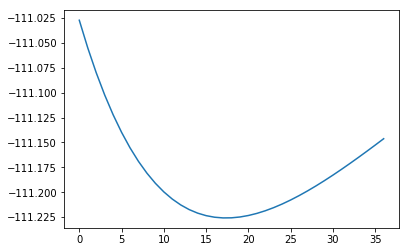

In [21]:
plt.plot(Morse(scan_r[3:],*mpa(g,h,R0,bde),bde))

[ 1.35108497  0.7459863  -0.09707127]
1.611162170158716
[ 1.24174841  0.80706426 -0.04881266]
1.2729370733189376
[ 1.07226014  0.93263161 -0.00489175]
0.4931797367167313


(-111.29972404275455, -110.99972404275455)

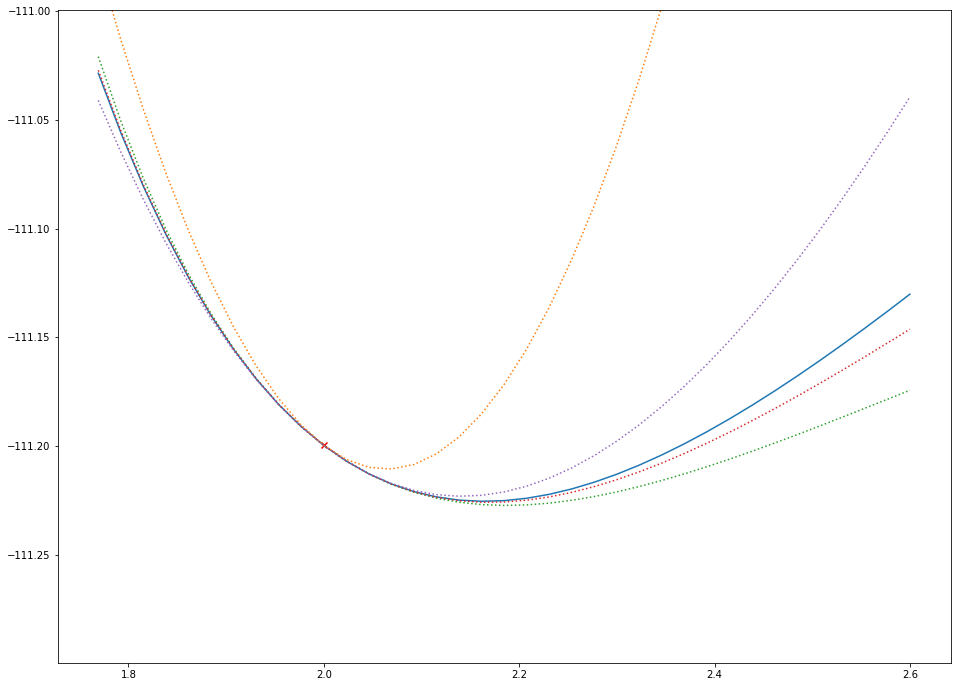

In [22]:
plt.figure(figsize=(16,12))
plt.scatter(R0,e_co,marker="x",color="red")
plt.plot(scan_r[3:],scan_e[3:],label="energy scan")
plt.plot(scan_r[3:],e_co+h*(scan_r[3:]-R0)**2+g*(scan_r[3:]-R0),ls=":")
plt.plot(scan_r[3:],Morse(scan_r[3:], *mpa(g,h,R0,.5*bde) ,.5*bde ),ls=":" )
plt.plot(scan_r[3:],Morse(scan_r[3:], *mpa(g,h,R0,bde) ,bde ),ls=":" )
plt.plot(scan_r[3:],Morse(scan_r[3:], *mpa(g,h,R0,10*bde) ,10*bde ),ls=":" )
plt.ylim(e_co-.1,e_co+.2)

In [23]:
R02=2.35
mol=gto.M(atom="C 0 0 0;O 0 0 {}".format(R02), unit="Bohr")
mf=scf.UHF(mol)
e_co2=mf.scf()
g2=mf.Gradients().grad()[1,2]
h2=mf.Hessian().hess()[1,1,2,2]

converged SCF energy = -111.203285221628  <S^2> = 6.750156e-14  2S+1 = 1
--------------- UHF gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000    -0.2161158496
1 O    -0.0000000000    -0.0000000000     0.2161158496
----------------------------------------------


In [24]:
def Morse2(r,r_e,a,De):
    return De*((np.exp(a*(r_e-r))-1)**2-(np.exp(a*(r_e-R02))-1)**2)+e_co2

In [25]:
bde2=ec+eo-e_co2
bde2

0.45188168429406517

[ 1.40158914  0.72224508 -0.12383422]
-0.8496874367650316
[ 1.40158914  0.72224508 -0.12383422]
2.3840509049224843
[ 1.27611576  0.78634573 -0.06246149]
-0.6786574286487846
[ 1.27611576  0.78634573 -0.06246149]
1.423333838645541
[ 1.08211855  0.92414902 -0.00626757]
-0.26910127455331784
[ 1.08211855  0.92414902 -0.00626757]
0.3411368710327548


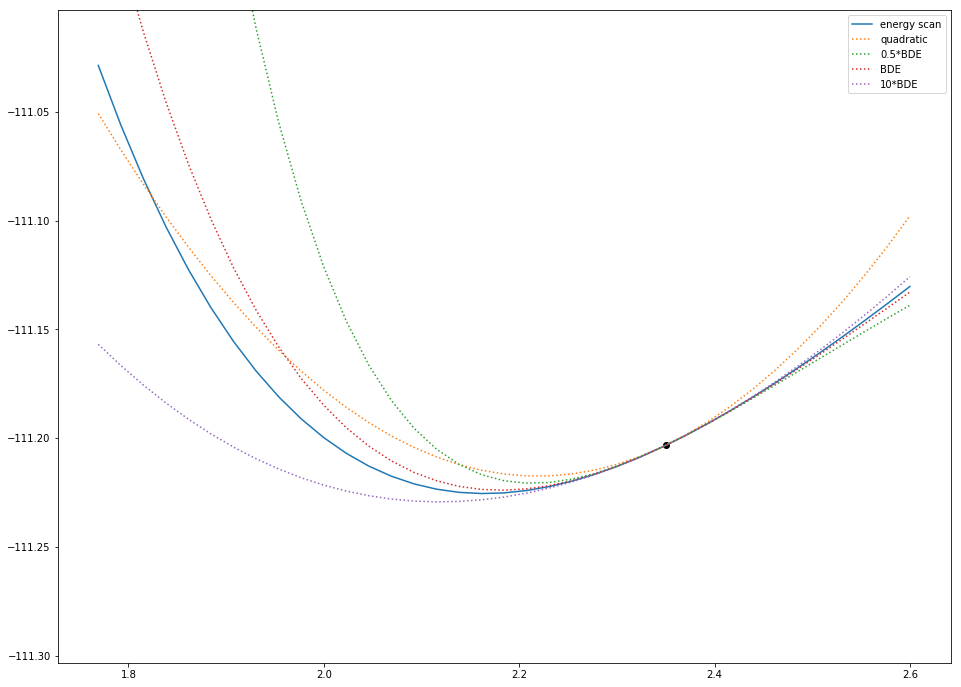

In [26]:
plt.figure(figsize=(16,12))
plt.scatter(R02,e_co2,marker="o",color="black")
plt.plot(scan_r[3:],scan_e[3:],label="energy scan")
plt.plot(scan_r[3:],e_co2+h2*(scan_r[3:]-R02)**2+g2*(scan_r[3:]-R02),ls=":",label="quadratic")
plt.plot(scan_r[3:],Morse2(scan_r[3:], *mpa(g2,h2,R02,.5*bde2) ,.5*bde2),ls=":" ,label="0.5*BDE")
plt.plot(scan_r[3:],Morse2(scan_r[3:], *mpa(g2,h2,R02,bde2) ,bde2 ) ,ls=":",label="BDE")
plt.plot(scan_r[3:],Morse2(scan_r[3:], *mpa(g2,h2,R02,bde2*10) ,bde2*10 ) ,ls=":",label="10*BDE")
plt.ylim(e_co2-.1,e_co2+.2)
plt.legend()

In [27]:
def Morse_dE(r,r_e,a,De):
    return De*((np.exp(a*(r_e-r))-1)**2)

In [28]:
x=Morse_dE(R02, *mpa(g2,h2,R02,bde2) ,bde2 )

[ 1.27611576  0.78634573 -0.06246149]
-0.6786574286487846
[ 1.27611576  0.78634573 -0.06246149]
1.423333838645541


In [29]:
x=Morse_dE(R02, *mpa(g2,h2,R02,bde2+x) ,bde2+x )
x

[ 1.26957292  0.79017841 -0.05975133]
-0.6682091161208495
[ 1.26957292  0.79017841 -0.05975133]
1.3793388895866596


0.02080226633189857

In [30]:
bde2+x

0.47268395062596374

## Morse potential for CH$_4$

In [31]:
l=3.3376
x=-(1/24)**.5*l
z=(2/3)**.5*l+x
ch4str="C 0 0 0; H 0 0  {}; H  0  {} {}; H {} {} {}; H {} {} {}".format(z,l/3**.5,x,l/2,-l*3**.5/6,x,-l/2,-l*3**.5/6,x)

In [32]:
z

2.043854241378284

In [33]:
CH4=gto.M(atom=ch4str,unit="bohr",basis="6-31G")
mf = scf.RHF(CH4)
mf.scf()
mf.Gradients().grad()

converged SCF energy = -40.1805533589015
--------------- RHF gradients ---------------
         x                y                z
0 C     0.0000000000     0.0000000000    -0.0000000000
1 H     0.0000000000    -0.0000000000    -0.0003981547
2 H    -0.0000000000    -0.0003753838     0.0001327182
3 H    -0.0003250919     0.0001876919     0.0001327182
4 H     0.0003250919     0.0001876919     0.0001327182
----------------------------------------------


array([[ 1.77375475e-16,  1.29258583e-15, -5.55111512e-17],
       [ 1.57426155e-16, -2.33537148e-16, -3.98154654e-04],
       [-2.49366500e-16, -3.75383808e-04,  1.32718218e-04],
       [-3.25091914e-04,  1.87691904e-04,  1.32718218e-04],
       [ 3.25091914e-04,  1.87691904e-04,  1.32718218e-04]])

In [48]:
scanX=np.linspace(1.6,3,43)
ch4scan=[]
for i in scanX:
    ch4str="C 0 0 0; H 0 0  {}; H  0  {} {}; H {} {} {}; H {} {} {}".format(i,l/3**.5,x,l/2,-l*3**.5/6,x,-l/2,-l*3**.5/6,x)
    ch4scan.append(scf.RHF(gto.M(atom=ch4str,unit="bohr",basis="6-31G",verbose=0)).scf())

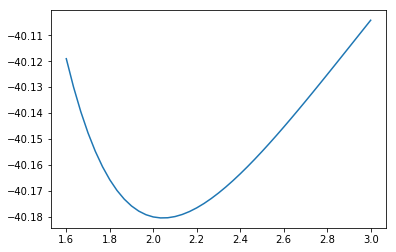

In [50]:
plt.plot(scanX,ch4scan)

# $D_e$ from APDFT

In [36]:
apch4=AP(mf,sites=[1])

In [37]:
apch4.build_gradient(1)

array([-1.11830467])

In [38]:
apch4.build_hessian(1)

array([[-1.07044075]])

In [39]:
apch4.build_cubic_hessian(1)

array([[[0.92687035]]])

In [40]:
apch4.APDFT3(np.asarray([-1]))#-mf.e_tot

-39.442990672885195

In [67]:
i=50
ch4str="C 0 0 0; H 0 0  {}; H  0  {} {}; H {} {} {}; H {} {} {}".format(i,l/3**.5,x,l/2,-l*3**.5/6,x,-l/2,-l*3**.5/6,x)
scf.UHF(gto.M(atom=ch4str,unit="bohr",basis="6-31G",verbose=0)).scf()

-39.31804765936593

In [75]:
De=apch4.APDFT3(np.asarray([-1]))-mf.e_tot
De

0.7375626860162612

In [76]:
i=1.8
ch4str="C 0 0 0; H 0 0  {}; H  0  {} {}; H {} {} {}; H {} {} {}".format(i,l/3**.5,x,l/2,-l*3**.5/6,x,-l/2,-l*3**.5/6,x)
mf0=scf.RHF(gto.M(atom=ch4str,unit="bohr",basis="6-31G",verbose=0))
e0=mf0.scf()
g=mf0.Gradients().grad()[1,2]
h=mf0.Hessian().hess()[1,1,2,2]

In [77]:
def Morse3(r,r_e,a,De):
    return De*((np.exp(a*(r_e-r))-1)**2-(np.exp(a*(r_e-i))-1)**2)+e0

In [81]:
mpa(g,h,i,De)

[ 1.13461455  0.88158049 -0.01619504]
0.6087708635622913


(2.0074557022840374, 0.6087708635622913)

In [88]:
e0-Morse_dE(1.8,r_e,a,De),r_e

(-40.17914682521128, 2.0074557022840374)

In [102]:
from scipy.interpolate import interp1d as i1d

In [110]:
intf=i1d(scanX,ch4scan)
intX=np.linspace(1.6,3,4201)
intE=intf(intX)

[ 1.13461455  0.88158049 -0.01619504]
0.6087708635622913
[ 1.13461455  0.88158049 -0.01619504]
0.6087708635622913


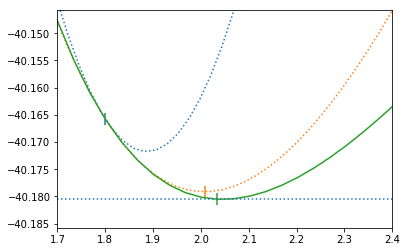

In [126]:
scanXm=np.linspace(1.4,6,201)
plt.scatter(1.8,e0,marker='|',s=150)
r_e,a=mpa(g,h,i,De)
plt.scatter(r_e,e0-Morse_dE(1.8,r_e,a,De),marker='|',s=150)
plt.scatter(intX[np.asarray(intE).argmin()],min(intE),marker='|',s=150)
plt.plot(scanXm, e0+h*(scanXm-i)**2+g*(scanXm-i),ls=":" )
plt.plot(scanXm,Morse3(scanXm, *mpa(g,h,i,De) ,De),ls=":" )
plt.plot(intX,intE)
plt.ylim(e0-.02,e0+.02)
plt.xlim(1.7,2.4)
plt.axhline(min(intE),ls=":")
plt.savefig("CH_stretching.png")

[ 1.13461455  0.88158049 -0.01619504]
0.6087708635622913


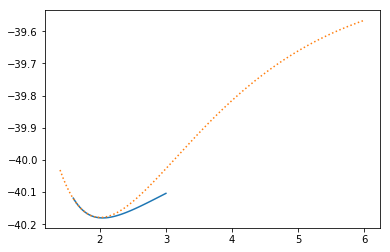

In [91]:
plt.plot(scanX,ch4scan)
plt.plot(scanXm,Morse3(scanXm, *mpa(g,h,i,De) ,De),ls=":" )